# Attribute Genration II

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data = pd.read_csv('../data/bus_data_stage_2.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed
0,76,217,-56.222400,-34.855885,2018-10-02 14:38:53,-56.222717,-34.855766,2018-10-02 14:39:23,31.807877,0 days 00:00:30.000000000,1.060263
1,76,217,-56.222717,-34.855766,2018-10-02 14:39:23,-56.222733,-34.855780,2018-10-02 14:39:53,2.134200,0 days 00:00:30.000000000,0.071140
2,76,217,-56.222733,-34.855780,2018-10-02 14:39:53,-56.222916,-34.855682,2018-10-02 14:40:08,19.939152,0 days 00:00:15.000000000,1.329277
3,76,217,-56.222916,-34.855682,2018-10-02 14:40:08,-56.222866,-34.855682,2018-10-02 14:40:23,4.562295,0 days 00:00:15.000000000,0.304153
4,76,217,-56.222866,-34.855682,2018-10-02 14:40:23,-56.222850,-34.855667,2018-10-02 14:40:38,2.216614,0 days 00:00:15.000000000,0.147774


Ahora vamos a crear una bounding box que contiene a todos los recorridos

In [3]:
MAX_LAT = data.latitude.max()
MAX_LON = data.longitude.max()
MIN_LAT = data.latitude.min()
MIN_LON = data.longitude.min()
print('Max Latitude: {1}\nMax Longitude: {1}\nMin Latitude: {2}\nMin Longitude: {3}\n'.format(MAX_LAT,
                                                                                              MAX_LON,
                                                                                              MIN_LAT,
                                                                                              MIN_LON))

Max Latitude: -55.99586
Max Longitude: -55.99586
Min Latitude: -34.928585
Min Longitude: -56.256016



Ahora creamos una bounding box con un padding de 0.001 _(100m)_ y sectores de 0.01 _(1Km)_.

In [4]:
step = 0.01
padding = 0.001
longitude = np.arange(MIN_LON+padding, MAX_LON+padding, step)
latitude  = np.arange(MIN_LAT+padding, MAX_LAT+padding, step)
print('Matrix ({0}x{1})'.format(len(latitude),len(longitude)))
matrix = pd.DataFrame(columns=['latitude','longitude'])
points_lat = []
points_lon = []
for lon in latitude:
    for lat in longitude:
        points_lat.append(lat)
        points_lon.append(lon)
matrix.latitude  = points_lat
matrix.longitude = points_lon

Matrix (22x27)


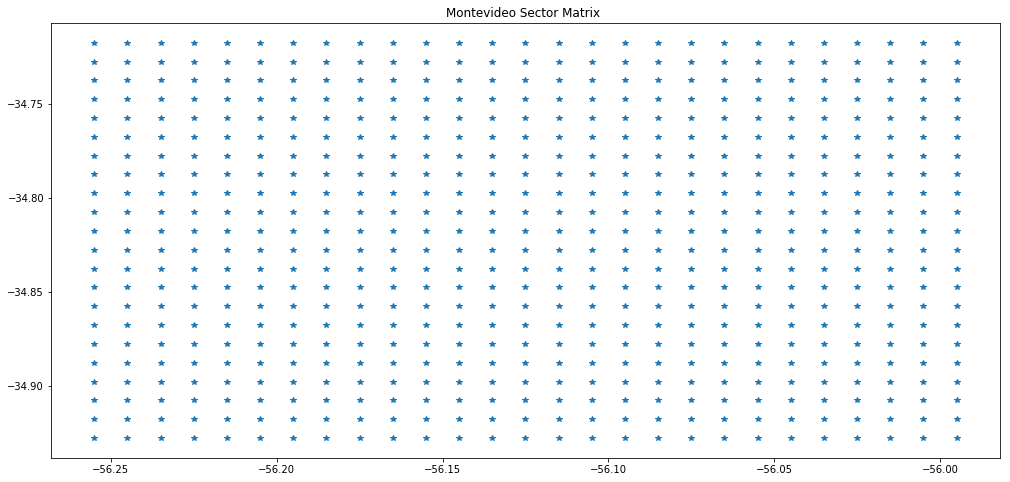

In [5]:
plt.figure(figsize=(17,8))
plt.title('Montevideo Sector Matrix ')
plt.plot(matrix.latitude, matrix.longitude,'*')

In [6]:
matrix.head()

,latitude,longitude
0,-56.255016,-34.927585
1,-56.245016,-34.927585
2,-56.235016,-34.927585
3,-56.225016,-34.927585
4,-56.215016,-34.927585


In [7]:
def print_base():
    plt.figure(figsize=(17,8))
    plt.plot(matrix.latitude, matrix.longitude,'o', c='b')
    
def print_section(position, section):
    plt.text(position[1]+0.002,position[0]-0.006, '({0},{1})'.format(str(section[0]),
                                                                     str(section[1])),
                                                                     fontsize=9, color='k')
    plt.plot(position[1]+0.005,position[0]-0.005,'s',c='r', markersize= 20)

def get_position_in_matrix(orig_lat, orig_long, dest_lat, dest_long, step = 0.01, padding = 0.001):
    longitude = np.arange(MIN_LON + padding, MAX_LON + padding, step)
    latitude  = np.arange(MIN_LAT + padding, MAX_LAT + padding, step)
    centroid_lat = orig_lat  + abs(orig_lat  - dest_lat) /2
    centroid_lon = orig_long + abs(orig_long - dest_long)/2
    position = [None, None]
    section  = [None, None]
    for index, lat in enumerate(latitude):
        if lat >= centroid_lat:
            position[0] = lat
            section[0]  = index
            break
    for index, lon in enumerate(longitude):
        if lon >= centroid_lon:
            position[1] = lon
            section[1]  = index
            break
    return section

def show_matrix(line, r=22,c=27):
    positions = []
    for row in line.itertuples():
        position = get_position_in_matrix(row.latitude,
                                          row.longitude,
                                          row.next_latitude,
                                          row.next_longitude)
        positions.append(position)
    speeds = line.speed
    matrix = np.zeros((r,c))
    
    fig, ax = plt.subplots()
    for index, point in enumerate(positions):
        matrix[point[0]][point[1]] = speeds[index]
        ax.text(point[0], point[1], round(speeds[index],0),
                       ha="center", va="center", color="w")

    ax.imshow(matrix[::-1])
#     plt.matshow(matrix[::-1])#,fignum=1)
    plt.show()

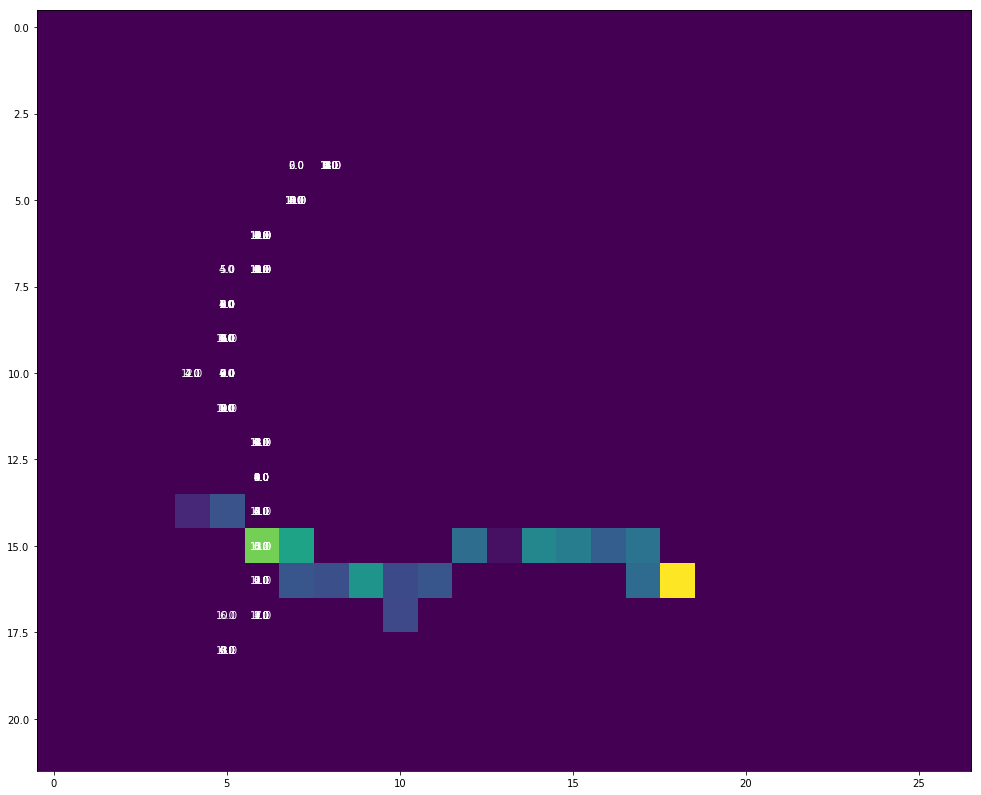

In [8]:
matplotlib.rcParams['figure.figsize'] = [20, 14]
line_217 = data.query('line==217 & id==76')
show_matrix(line_217)